In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter("ignore")

In [2]:
# Loading Data
df = pd.read_csv("../data/encoded_data.csv")
df.head()

,Age,Sex,Chest Pain,Rest BP,Cholesterol,Fasting Sugar,Rest ECG,Max HR,Ex Angina,ST Depression,ST Slope,Fluoroscopy,Thalassemia,Heart Disease
0,28.0,male,atypical angina,130.0,132.000000,False,left ventricular hypertrophy,185.0,no,0.0,upsloping,0 vessels,normal,< 50% diameter narrowing
1,29.0,male,atypical angina,120.0,243.000000,False,normal,160.0,no,0.0,upsloping,0 vessels,normal,< 50% diameter narrowing
2,29.0,male,atypical angina,140.0,230.753086,False,normal,170.0,no,0.0,upsloping,0 vessels,normal,< 50% diameter narrowing
3,30.0,female,typical angina,170.0,237.000000,False,ST-T wave abnormality,170.0,no,0.0,upsloping,0 vessels,fixed defect,< 50% diameter narrowing
4,31.0,female,atypical angina,100.0,219.000000,False,ST-T wave abnormality,150.0,no,0.0,upsloping,0 vessels,normal,< 50% diameter narrowing


In [3]:
# Setting up style for better-looking plots
sns.set(style="whitegrid")

# List of categorical and numerical columns
categorical_columns = ['Sex', 'Chest Pain', 'Fasting Sugar', 'Rest ECG', 'Ex Angina', 'ST Slope', 'Fluoroscopy', 'Thalassemia', 'Heart Disease']
numerical_columns = ['Age', 'Rest BP', 'Cholesterol', 'Max HR', 'ST Depression']

# Univariate Analysis

Analysis for Sex:



,Sex,Frequency,Percentage
0,male,532,73.991655
1,female,187,26.008345


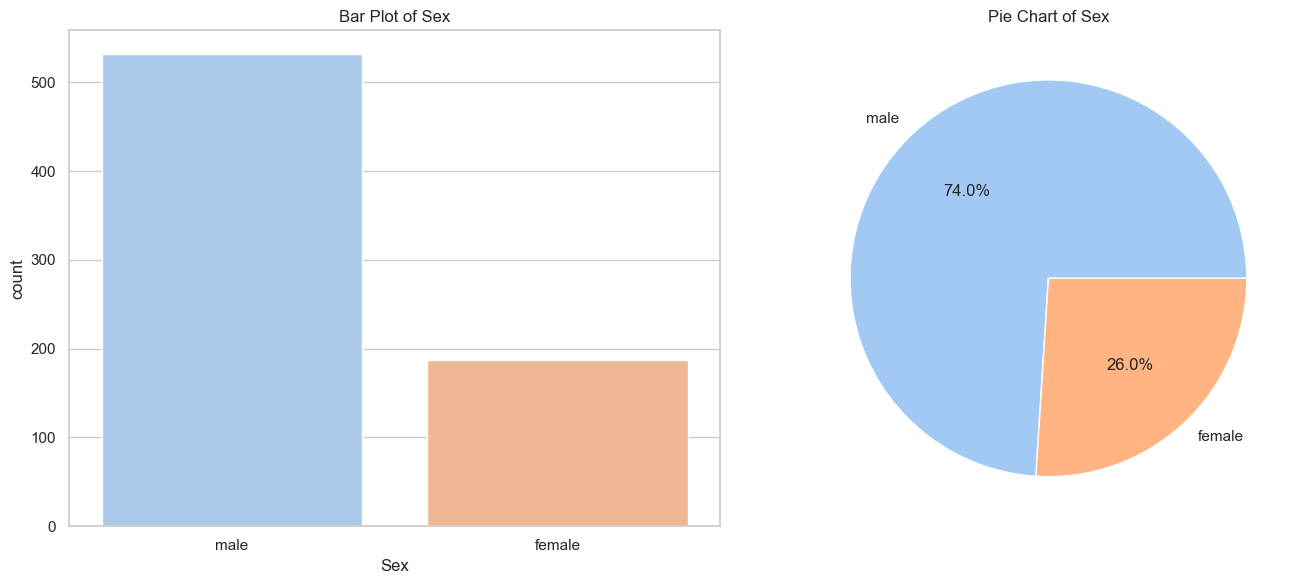

Analysis for Chest Pain:



,Chest Pain,Frequency,Percentage
0,asymptomatic,365,50.764951
1,atypical angina,159,22.114047
2,non-anginal pain,157,21.835883
3,typical angina,38,5.285118


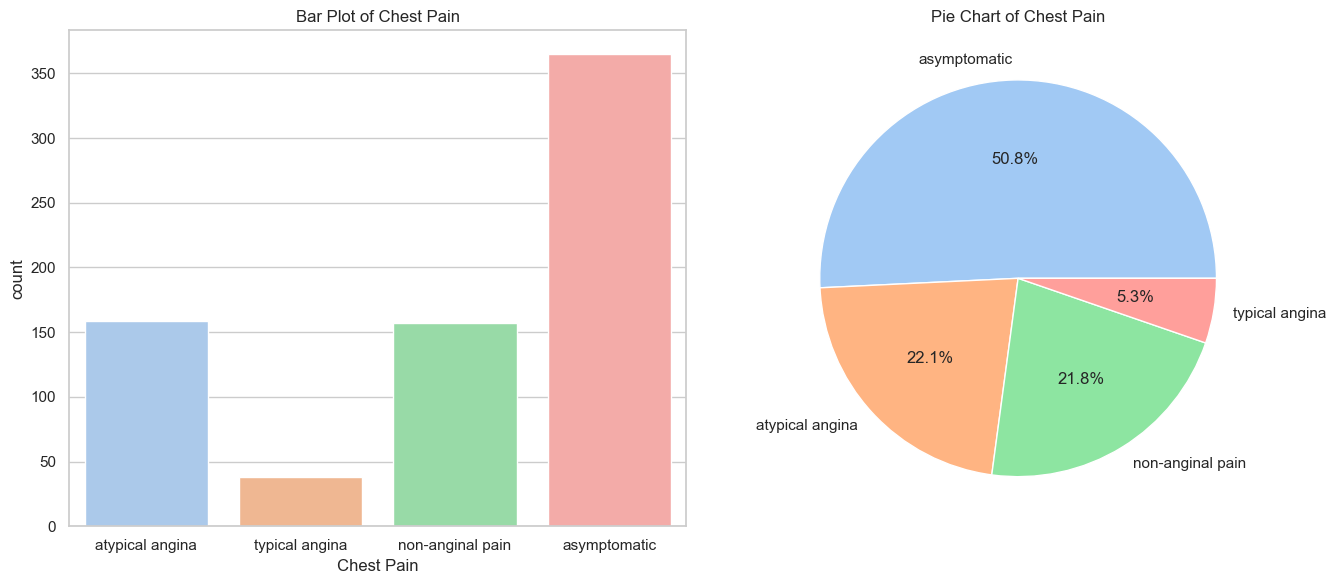

Analysis for Fasting Sugar:



,Fasting Sugar,Frequency,Percentage
0,False,648,90.250696
1,True,70,9.749304


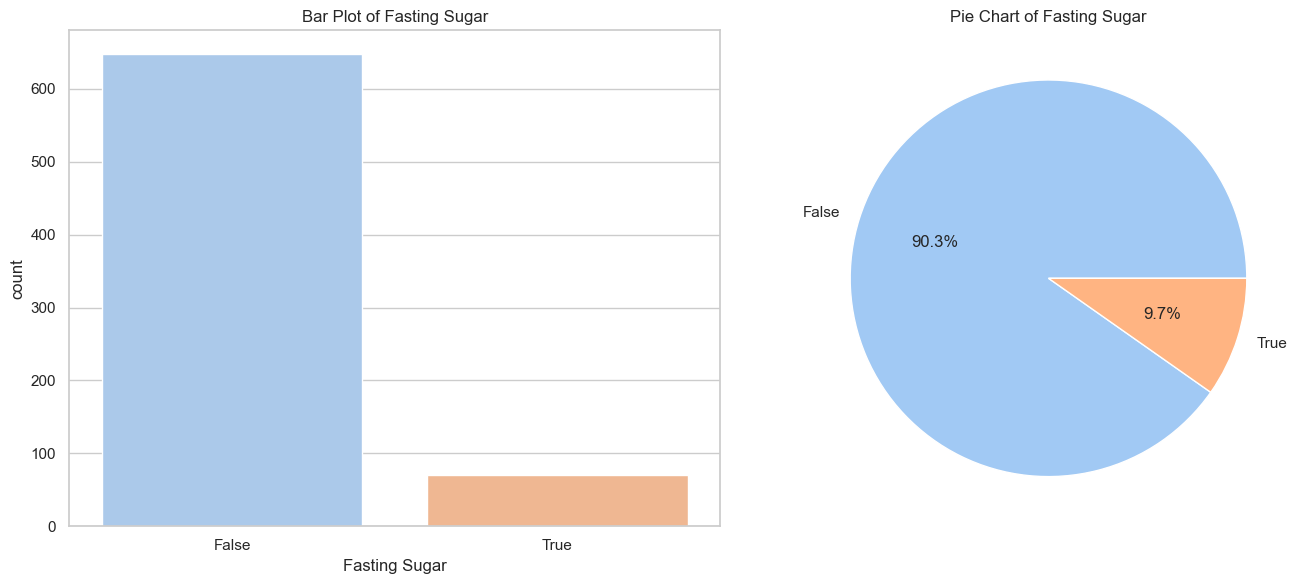

Analysis for Rest ECG:



,Rest ECG,Frequency,Percentage
0,normal,472,65.646732
1,left ventricular hypertrophy,161,22.392211
2,ST-T wave abnormality,86,11.961057


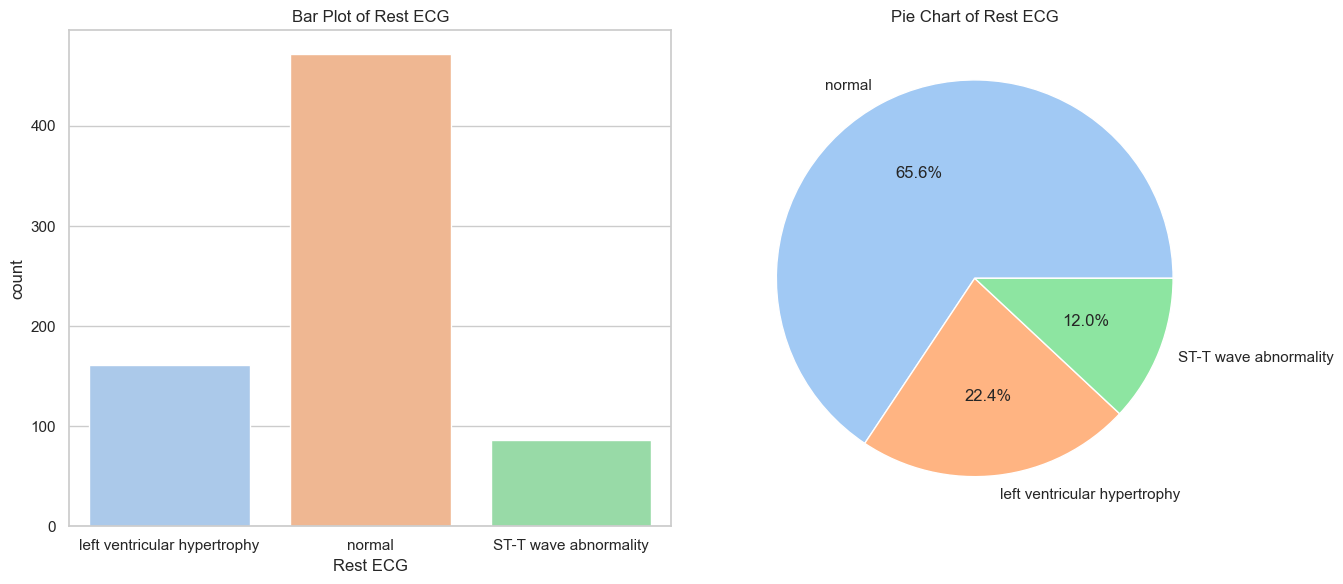

Analysis for Ex Angina:



,Ex Angina,Frequency,Percentage
0,no,476,66.20306
1,yes,243,33.79694


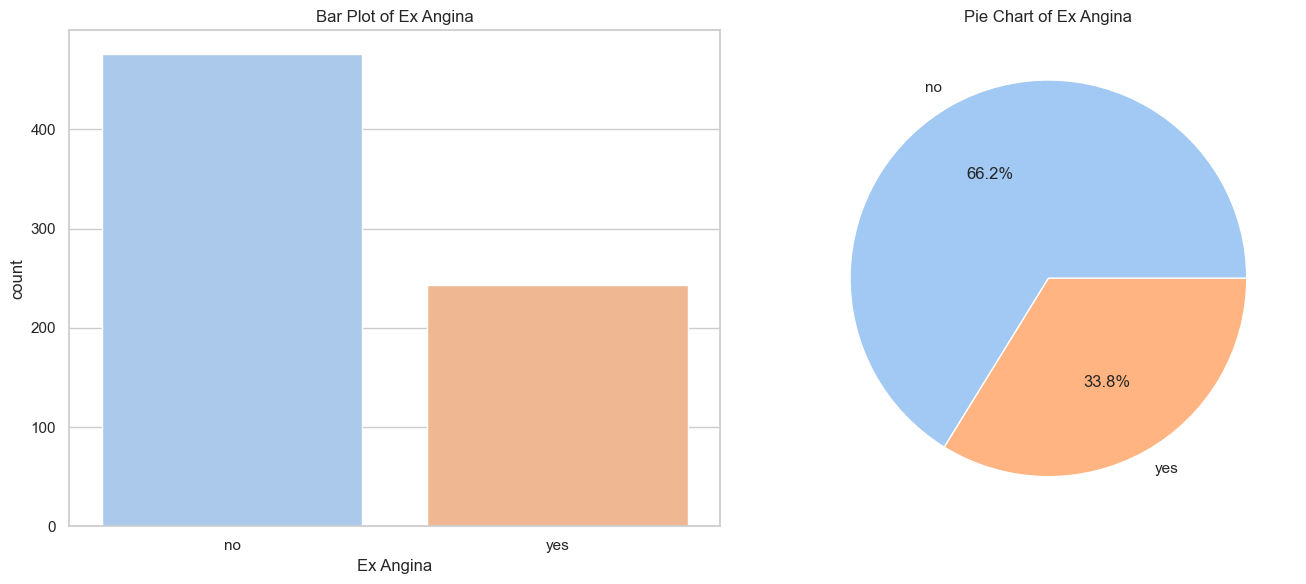

Analysis for ST Slope:



,ST Slope,Frequency,Percentage
0,flat,348,48.467967
1,upsloping,336,46.796657
2,downsloping,34,4.735376


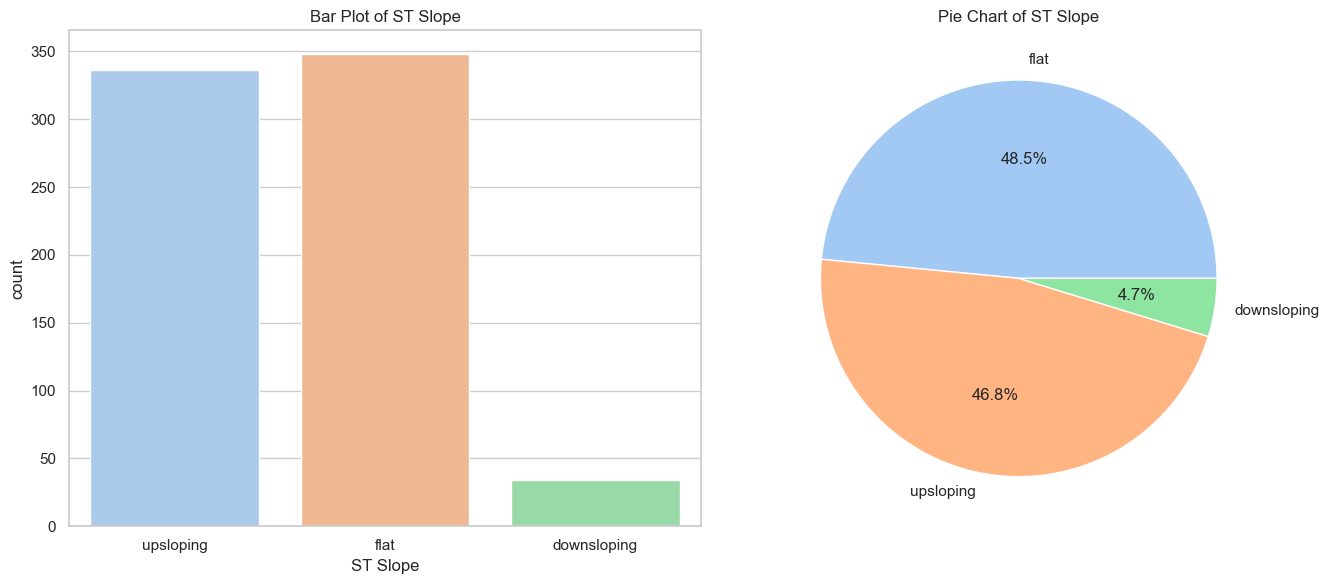

Analysis for Fluoroscopy:



,Fluoroscopy,Frequency,Percentage
0,0 vessels,416,58.345021
1,1 vessel,206,28.892006
2,2 vessels,66,9.256662
3,3 vessels,25,3.506311


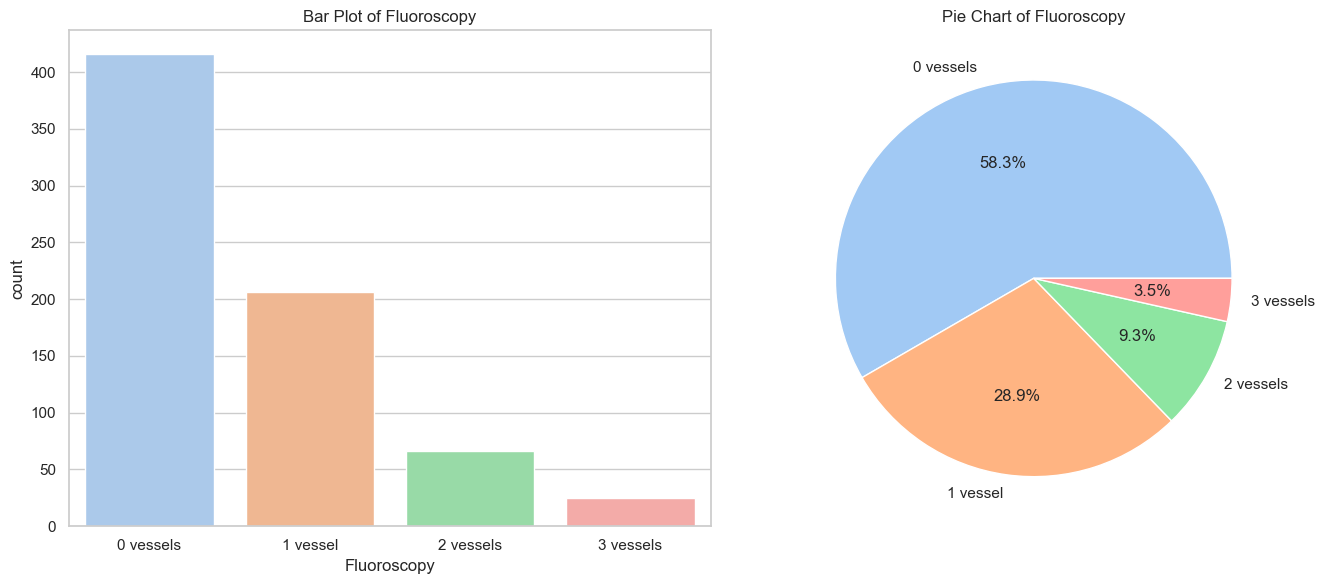

Analysis for Thalassemia:



,Thalassemia,Frequency,Percentage
0,normal,388,53.963839
1,reversible defect,293,40.751043
2,fixed defect,38,5.285118


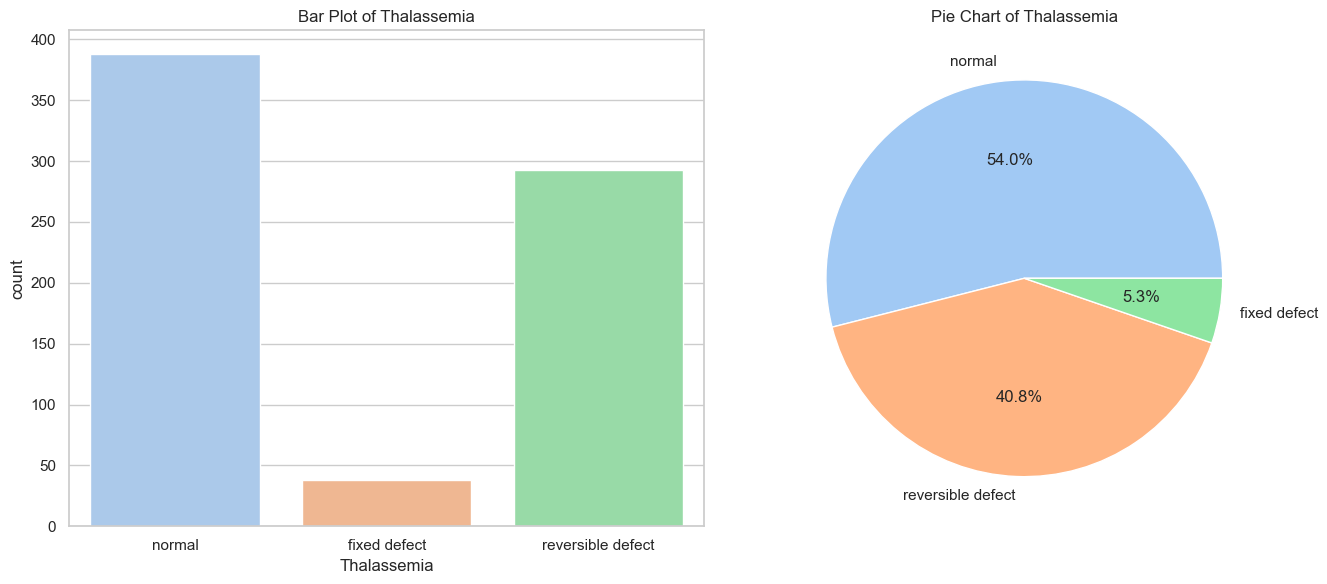

Analysis for Heart Disease:



,Heart Disease,Frequency,Percentage
0,> 50% diameter narrowing,360,50.069541
1,< 50% diameter narrowing,359,49.930459


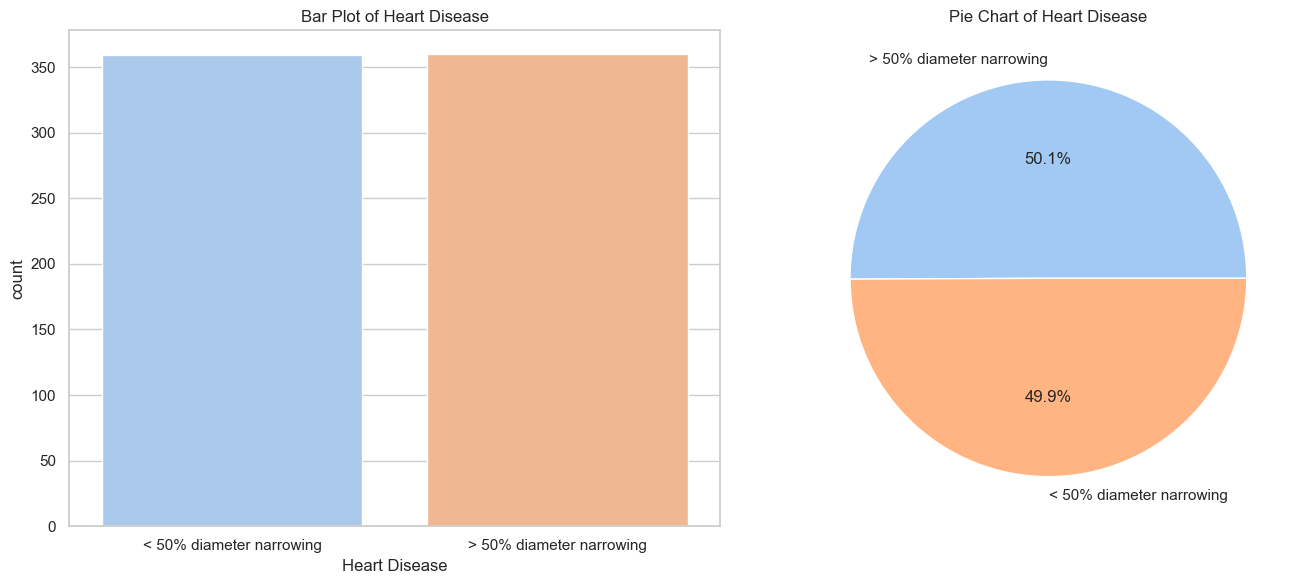

In [4]:
# Univariate Analysis for Categorical Columns
for column in categorical_columns:
    print(f"Analysis for {column}:\n")
    
    # Frequency and Percentage Table
    freq_table = df[column].value_counts()
    percent_table = df[column].value_counts(normalize=True) * 100
    table = pd.DataFrame({column: freq_table.index, 'Frequency': freq_table.values, 'Percentage': percent_table.values})
    display(table)
    print("\n")

    # Create a figure with two subplots side by side
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Bar Plot on the left
    sns.countplot(data=df, x=column, palette="pastel", ax=ax[0])
    ax[0].set_title(f"Bar Plot of {column}")

    # Pie Chart on the right
    df[column].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"), ax=ax[1])
    ax[1].set_title(f"Pie Chart of {column}")
    ax[1].set_ylabel('')  # Hide y-label

    # Adjust layout to make the plots look better
    plt.tight_layout()
    plt.show()

Analysis for Age:



count    719.000000
mean      51.892907
std        9.199488
min       28.000000
25%       45.000000
50%       53.000000
75%       58.000000
max       77.000000
Name: Age, dtype: float64

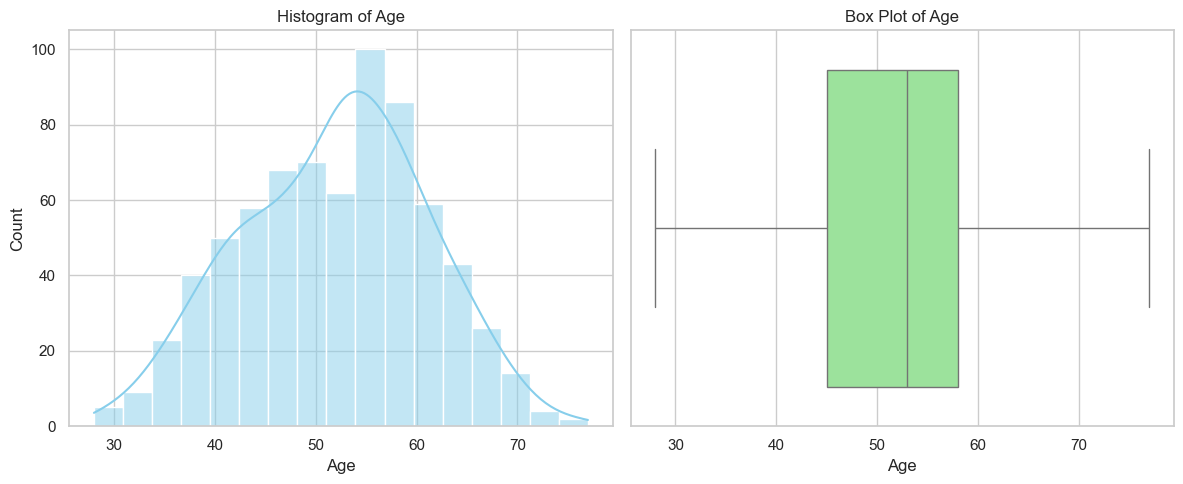

Analysis for Rest BP:



count    719.000000
mean     131.824538
std       18.486531
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: Rest BP, dtype: float64

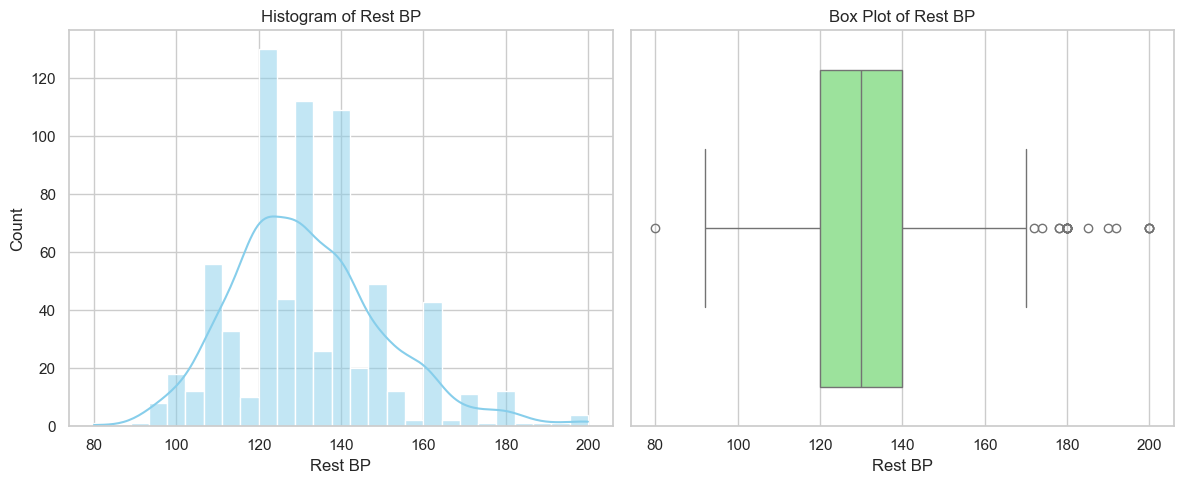

Analysis for Cholesterol:



count    719.000000
mean     205.443795
std      107.704937
min        0.000000
25%      184.000000
50%      228.000000
75%      269.000000
max      603.000000
Name: Cholesterol, dtype: float64

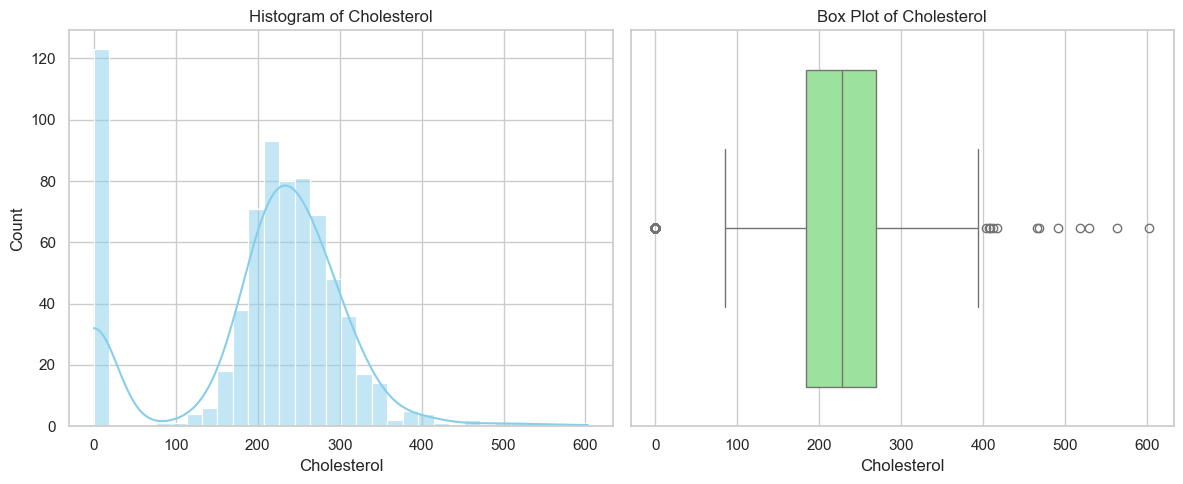

Analysis for Max HR:



count    719.00000
mean     140.52506
std       25.63790
min       60.00000
25%      122.00000
50%      142.00000
75%      160.00000
max      202.00000
Name: Max HR, dtype: float64

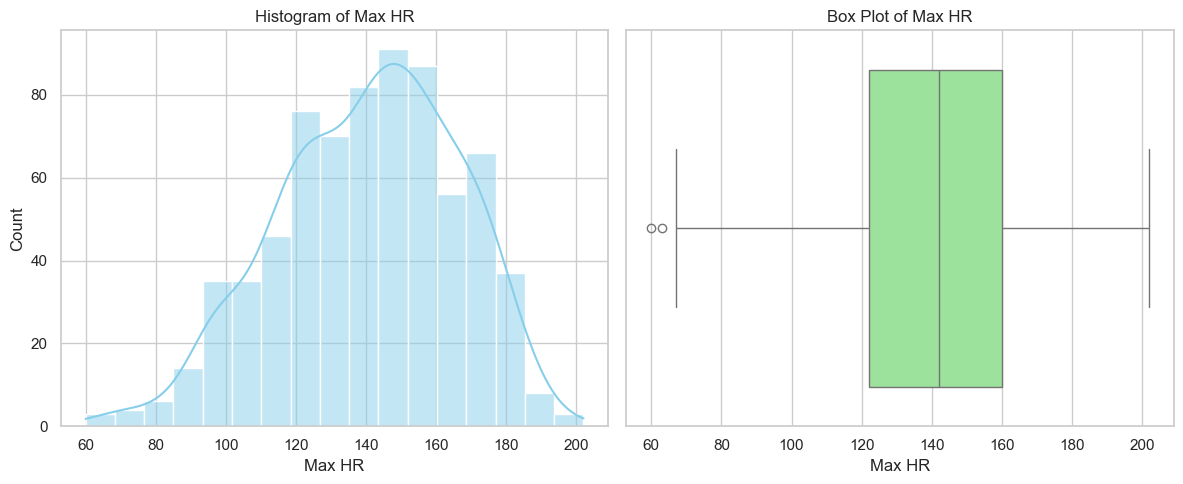

Analysis for ST Depression:



count    719.000000
mean       0.795101
std        1.063942
min       -2.600000
25%        0.000000
50%        0.200000
75%        1.500000
max        6.200000
Name: ST Depression, dtype: float64

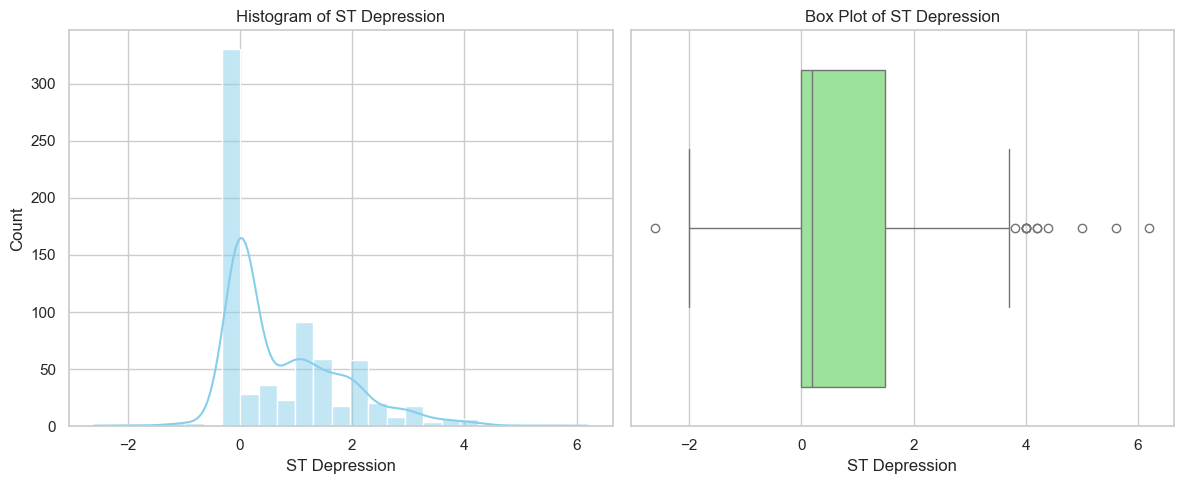

In [5]:
# Univariate Analysis for Numerical Columns
for column in numerical_columns:
    print(f"Analysis for {column}:\n")
    
    # Summary Statistics
    summary_stats = df[column].describe()
    display(summary_stats)
    print("\n")

    # Subplots for histogram and box plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Histogram with KDE
    sns.histplot(df[column], kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title(f"Histogram of {column}")

    # Box Plot
    sns.boxplot(x=df[column], color='lightgreen', ax=axes[1])
    axes[1].set_title(f"Box Plot of {column}")
    
    plt.tight_layout()
    plt.show()

# Bivariate Analysis

Bivariate Analysis: Categorical Features

Analysis for Sex with Heart Disease:

Sex = female: Heart Disease Ratio = 0.25
Sex = male: Heart Disease Ratio = 0.59




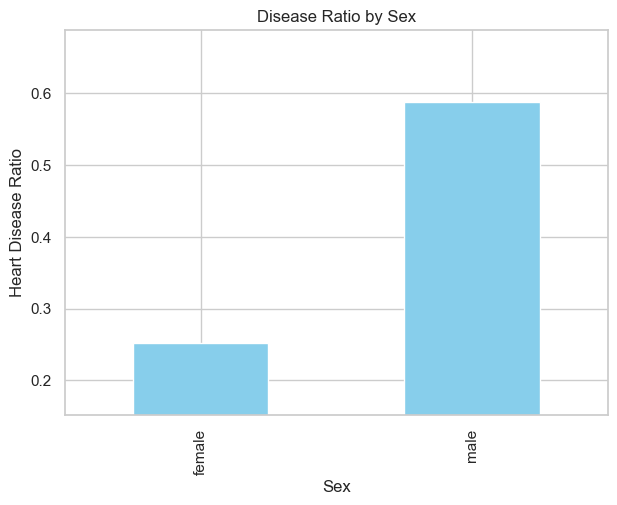

Analysis for Chest Pain with Heart Disease:

Chest Pain = asymptomatic: Heart Disease Ratio = 0.78
Chest Pain = atypical angina: Heart Disease Ratio = 0.12
Chest Pain = non-anginal pain: Heart Disease Ratio = 0.27
Chest Pain = typical angina: Heart Disease Ratio = 0.39




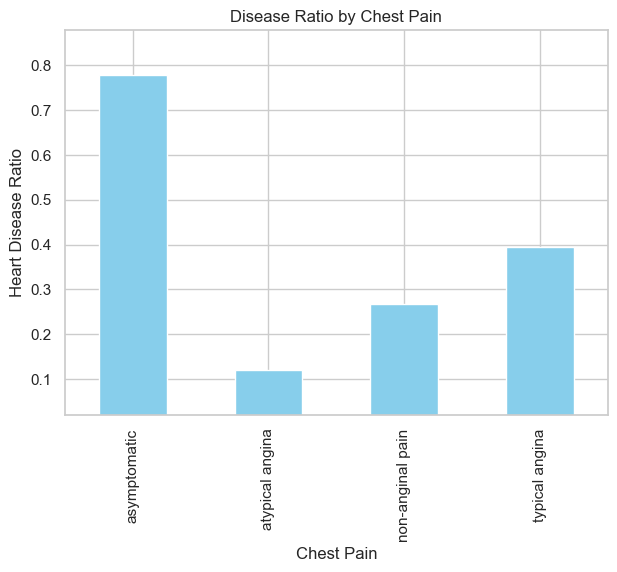

Analysis for Fasting Sugar with Heart Disease:

Fasting Sugar = False: Heart Disease Ratio = 0.49
Fasting Sugar = True: Heart Disease Ratio = 0.57




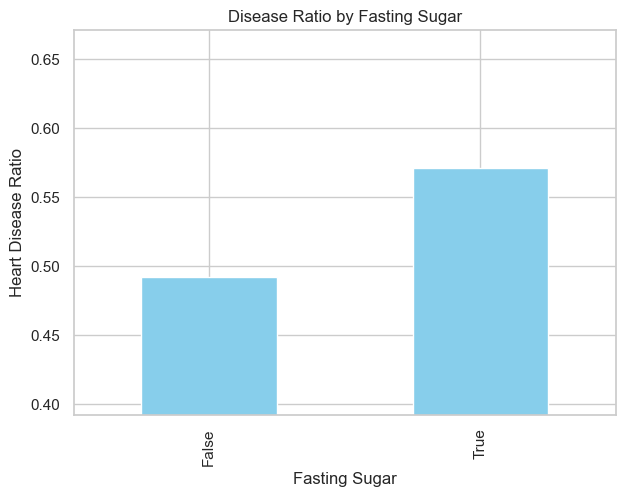

Analysis for Rest ECG with Heart Disease:

Rest ECG = ST-T wave abnormality: Heart Disease Ratio = 0.58
Rest ECG = left ventricular hypertrophy: Heart Disease Ratio = 0.54
Rest ECG = normal: Heart Disease Ratio = 0.47




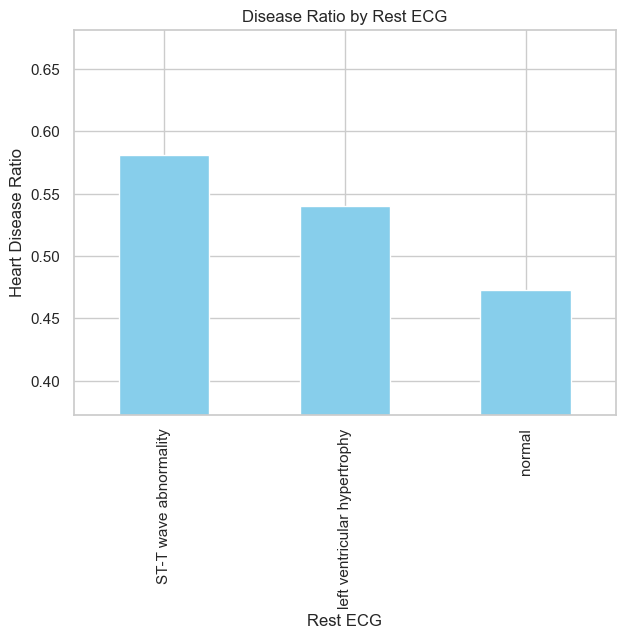

Analysis for Ex Angina with Heart Disease:

Ex Angina = no: Heart Disease Ratio = 0.34
Ex Angina = yes: Heart Disease Ratio = 0.82




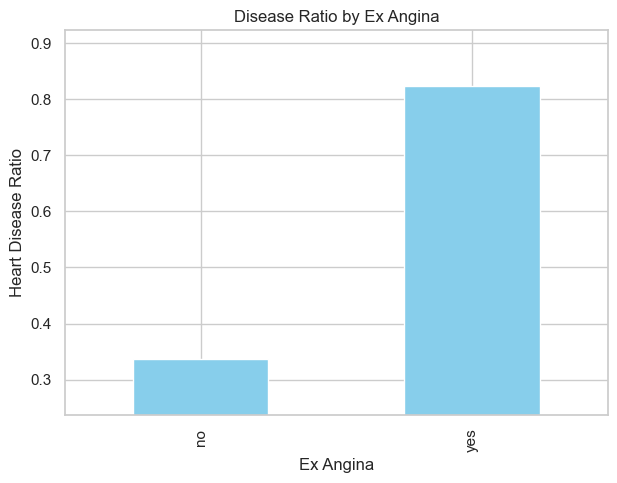

Analysis for ST Slope with Heart Disease:

ST Slope = downsloping: Heart Disease Ratio = 0.68
ST Slope = flat: Heart Disease Ratio = 0.78
ST Slope = upsloping: Heart Disease Ratio = 0.19




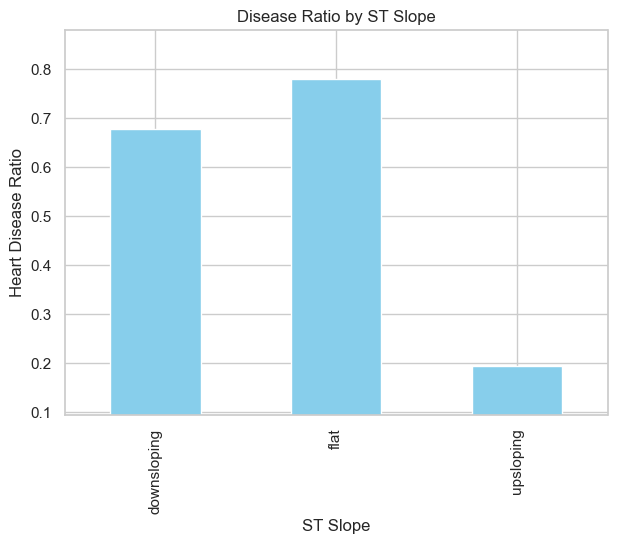

Analysis for Fluoroscopy with Heart Disease:

Fluoroscopy = 0 vessels: Heart Disease Ratio = 0.21
Fluoroscopy = 1 vessel: Heart Disease Ratio = 0.90
Fluoroscopy = 2 vessels: Heart Disease Ratio = 0.88
Fluoroscopy = 3 vessels: Heart Disease Ratio = 0.88




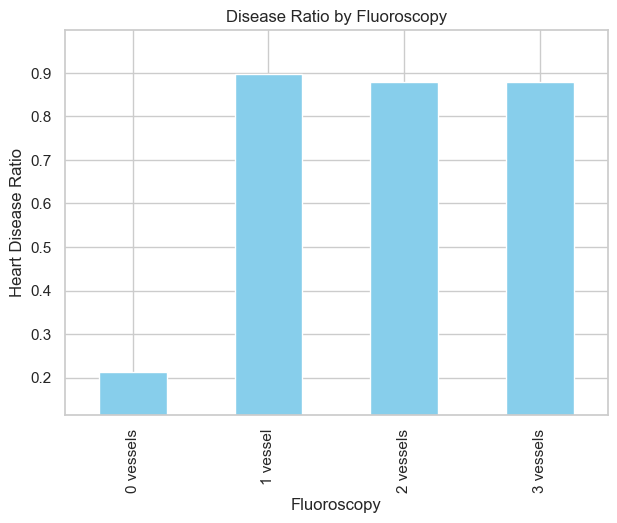

Analysis for Thalassemia with Heart Disease:

Thalassemia = fixed defect: Heart Disease Ratio = 0.74
Thalassemia = normal: Heart Disease Ratio = 0.19
Thalassemia = reversible defect: Heart Disease Ratio = 0.89




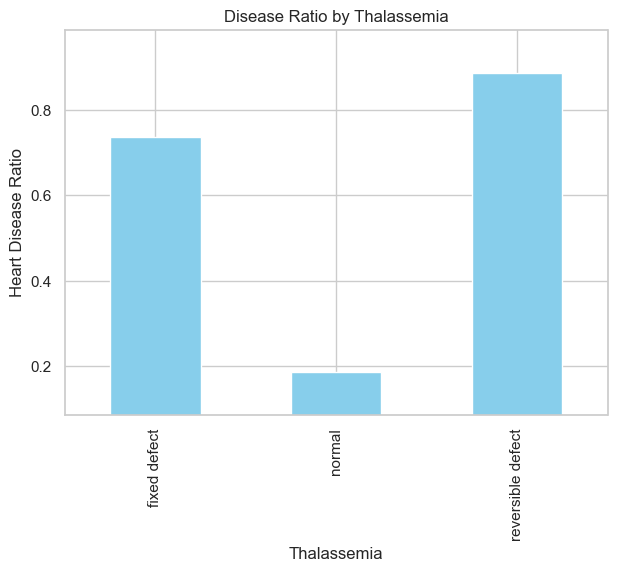

Analysis for Heart Disease with Heart Disease:

Heart Disease = < 50% diameter narrowing: Heart Disease Ratio = 0.00
Heart Disease = > 50% diameter narrowing: Heart Disease Ratio = 1.00




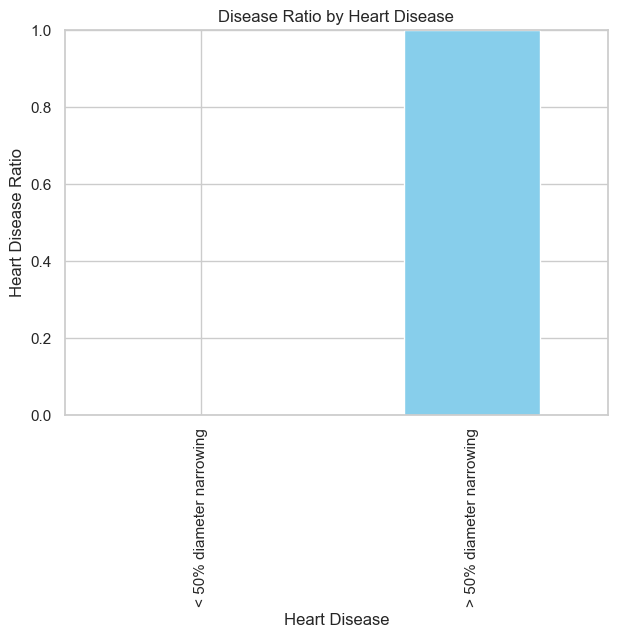

In [6]:
# Bivariate Analysis for Categorical Columns with Target
print("Bivariate Analysis: Categorical Features\n")
for column in categorical_columns:
    print(f"Analysis for {column} with Heart Disease:\n")
    
    # Calculate the ratio of heart disease for each category
    category_ratio = df.groupby(column)['Heart Disease'].apply(lambda x: (x == '> 50% diameter narrowing').mean())
    
    # Print the ratios
    for category, ratio in category_ratio.items():
        print(f"{column} = {category}: Heart Disease Ratio = {ratio:.2f}")
    
    print("\n")
    
    # Plotting the ratios
    plt.figure(figsize=(7, 5))
    category_ratio.plot(kind='bar', color='skyblue')
    plt.ylim(max(category_ratio.min() - 0.1, 0), min(category_ratio.max() + 0.1, 1))
    plt.title(f"Disease Ratio by {column}")
    plt.ylabel('Heart Disease Ratio')
    plt.show()

Bivariate Analysis: Numerical Features

Analysis for Age with Heart Disease:

Heart Disease = < 50% diameter narrowing: Average Age = 49.66
Heart Disease = > 50% diameter narrowing: Average Age = 54.12




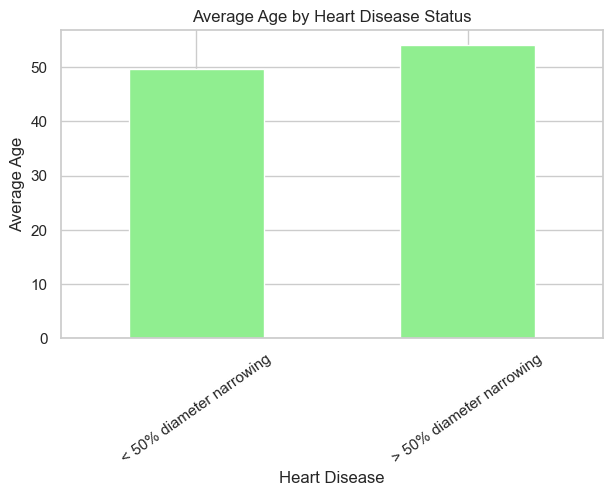

Analysis for Rest BP with Heart Disease:

Heart Disease = < 50% diameter narrowing: Average Rest BP = 129.96
Heart Disease = > 50% diameter narrowing: Average Rest BP = 133.68




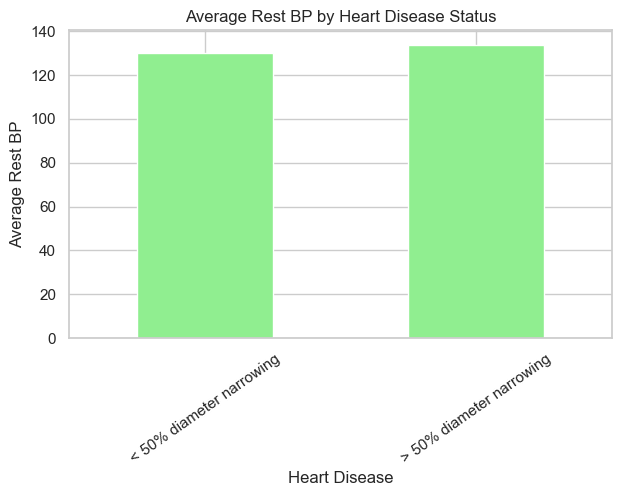

Analysis for Cholesterol with Heart Disease:

Heart Disease = < 50% diameter narrowing: Average Cholesterol = 235.59
Heart Disease = > 50% diameter narrowing: Average Cholesterol = 175.38




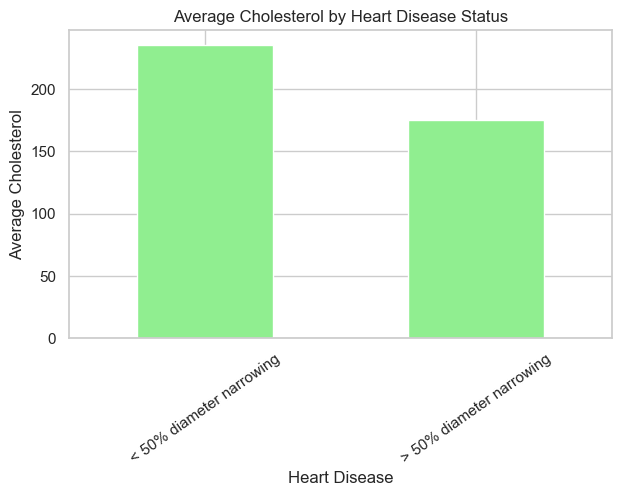

Analysis for Max HR with Heart Disease:

Heart Disease = < 50% diameter narrowing: Average Max HR = 150.91
Heart Disease = > 50% diameter narrowing: Average Max HR = 130.17




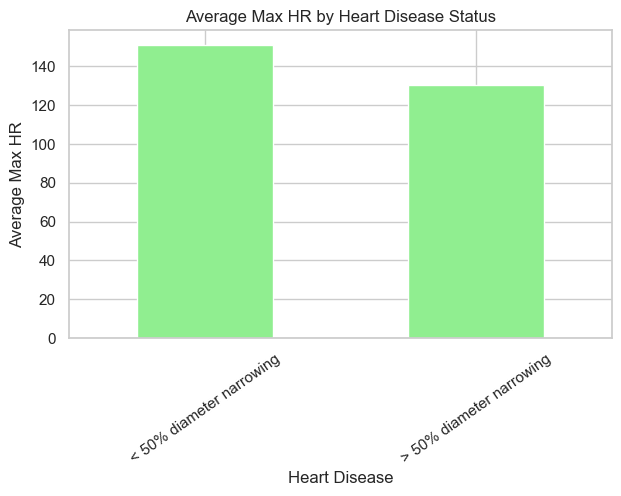

Analysis for ST Depression with Heart Disease:

Heart Disease = < 50% diameter narrowing: Average ST Depression = 0.39
Heart Disease = > 50% diameter narrowing: Average ST Depression = 1.20




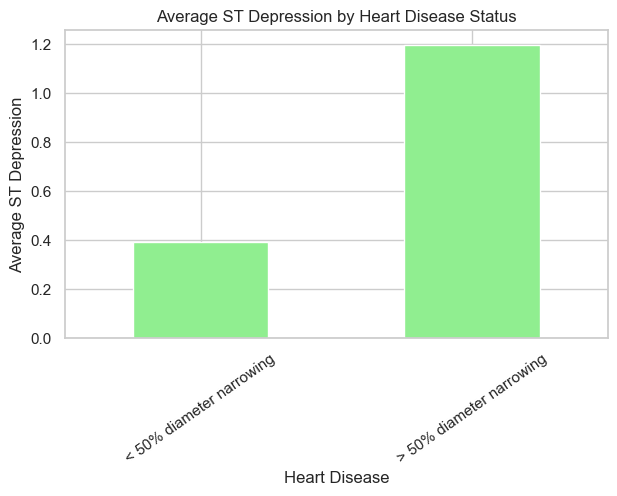

In [7]:
# Bivariate Analysis for Numerical Columns with Target
print("Bivariate Analysis: Numerical Features\n")
for column in numerical_columns:
    print(f"Analysis for {column} with Heart Disease:\n")
    
    # Calculate the average value of the feature for each category of the target variable
    avg_value = df.groupby('Heart Disease')[column].mean()
    
    # Print the average values
    for heart_disease_status, avg in avg_value.items():
        print(f"Heart Disease = {heart_disease_status}: Average {column} = {avg:.2f}")
    
    print("\n")
    
    # Plotting the averages
    plt.figure(figsize=(7, 4))
    avg_value.plot(kind='bar', color='lightgreen')
    plt.title(f"Average {column} by Heart Disease Status")
    plt.ylabel(f"Average {column}")
    plt.xticks(rotation=35)
    plt.show()